In [56]:
# Import the required packages 

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from  itertools import chain

In [57]:
# Load the df and have a look 
am_df = pd.read_csv("automobile.txt")

am_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [58]:
# UNDERSTANDING THE DATA

# symboling - Symboling corresponds to the degree to which the auto is more risky than its price indicates. 
# Cars are initially assigned a risk factor symbol associated with its price. 
# Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. 
# A value of +3 indicates that the auto is risky, -2 that it is probably pretty safe.

# normalized losses - is the relative average loss payment per insured vehicle year.

# aspiration - unsure - will remove

# bore - the diameter of each cylinder

# stroke - The piston rides up and down inside the cylinder on a connecting rod that attaches to the crankshaft, causing the crankshaft to turn. 
# Each movement of the piston is called a stroke.

# compression ratio - the ratio between the volume of the cylinder with the piston in the bottom position, and in the top position. 
# The higher this ratio, the greater will be the power output from a given engine. It is generally in the 6–10 range.

In [59]:
# DATA CLEANING
missing = am_df.isnull().sum()

# This shows no data is missing, however, we can see ?
am_df = am_df.replace("?", np.nan)

In [60]:
missing = am_df.isnull().sum()
missing[0:27]

# There is not a lot of missing info. Normalized losses has the most.

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [61]:
# Remove certain columns that I won't be using 

am_df.drop(['normalized-losses', 'aspiration', 'curb-weight', 'bore', 'stroke'], axis=1, inplace=True)

am_df.head()

,symboling,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-type,num-of-cylinders,engine-size,fuel-system,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,...,dohc,four,130,mpfi,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,...,dohc,four,130,mpfi,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,...,ohcv,six,152,mpfi,9.0,154,5000,19,26,16500
3,2,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,...,ohc,four,109,mpfi,10.0,102,5500,24,30,13950
4,2,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,...,ohc,five,136,mpfi,8.0,115,5500,18,22,17450


In [62]:
# Remove any duplicates
am_df = am_df.drop_duplicates()

In [63]:
# Remove rows with missing values
am_df = am_df.dropna()

In [64]:
# Checking the range of data - symboling
print(f"Symboling: {am_df.symboling.unique()}")
print(f"Make: {am_df.make.unique()}")
print(am_df["fuel-type"].unique())

Symboling: [ 3  1  2  0 -1 -2]
Make: ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
['gas' 'diesel']


In [65]:
#  Convert certain data types so they are easier to work with
am_df['horsepower'] = pd.to_numeric(am_df['horsepower'])
am_df['peak-rpm'] = pd.to_numeric(am_df['peak-rpm'])
am_df['price'] = pd.to_numeric(am_df['price'])
am_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 204
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          197 non-null    int64  
 1   make               197 non-null    object 
 2   fuel-type          197 non-null    object 
 3   num-of-doors       197 non-null    object 
 4   body-style         197 non-null    object 
 5   drive-wheels       197 non-null    object 
 6   engine-location    197 non-null    object 
 7   wheel-base         197 non-null    float64
 8   length             197 non-null    float64
 9   width              197 non-null    float64
 10  height             197 non-null    float64
 11  engine-type        197 non-null    object 
 12  num-of-cylinders   197 non-null    object 
 13  engine-size        197 non-null    int64  
 14  fuel-system        197 non-null    object 
 15  compression-ratio  197 non-null    float64
 16  horsepower         197 non

In [66]:
# EDA

# Summary statistics
am_df.describe()

,symboling,wheel-base,length,width,height,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.842640,98.850254,174.218274,65.889848,53.783249,126.994924,10.128528,103.604061,5118.020305,25.152284,30.629442,13279.644670
std,1.261926,6.110827,12.373547,2.116046,2.445899,41.913114,3.938099,37.639205,481.035914,6.437863,6.836259,8010.334218
min,-2.000000,86.600000,141.100000,60.300000,47.800000,61.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,97.000000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,119.000000,9.000000,95.000000,5200.000000,24.000000,30.000000,10345.000000
75%,2.000000,102.400000,183.500000,66.900000,55.600000,145.000000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,326.000000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


<AxesSubplot: xlabel='make', ylabel='horsepower'>

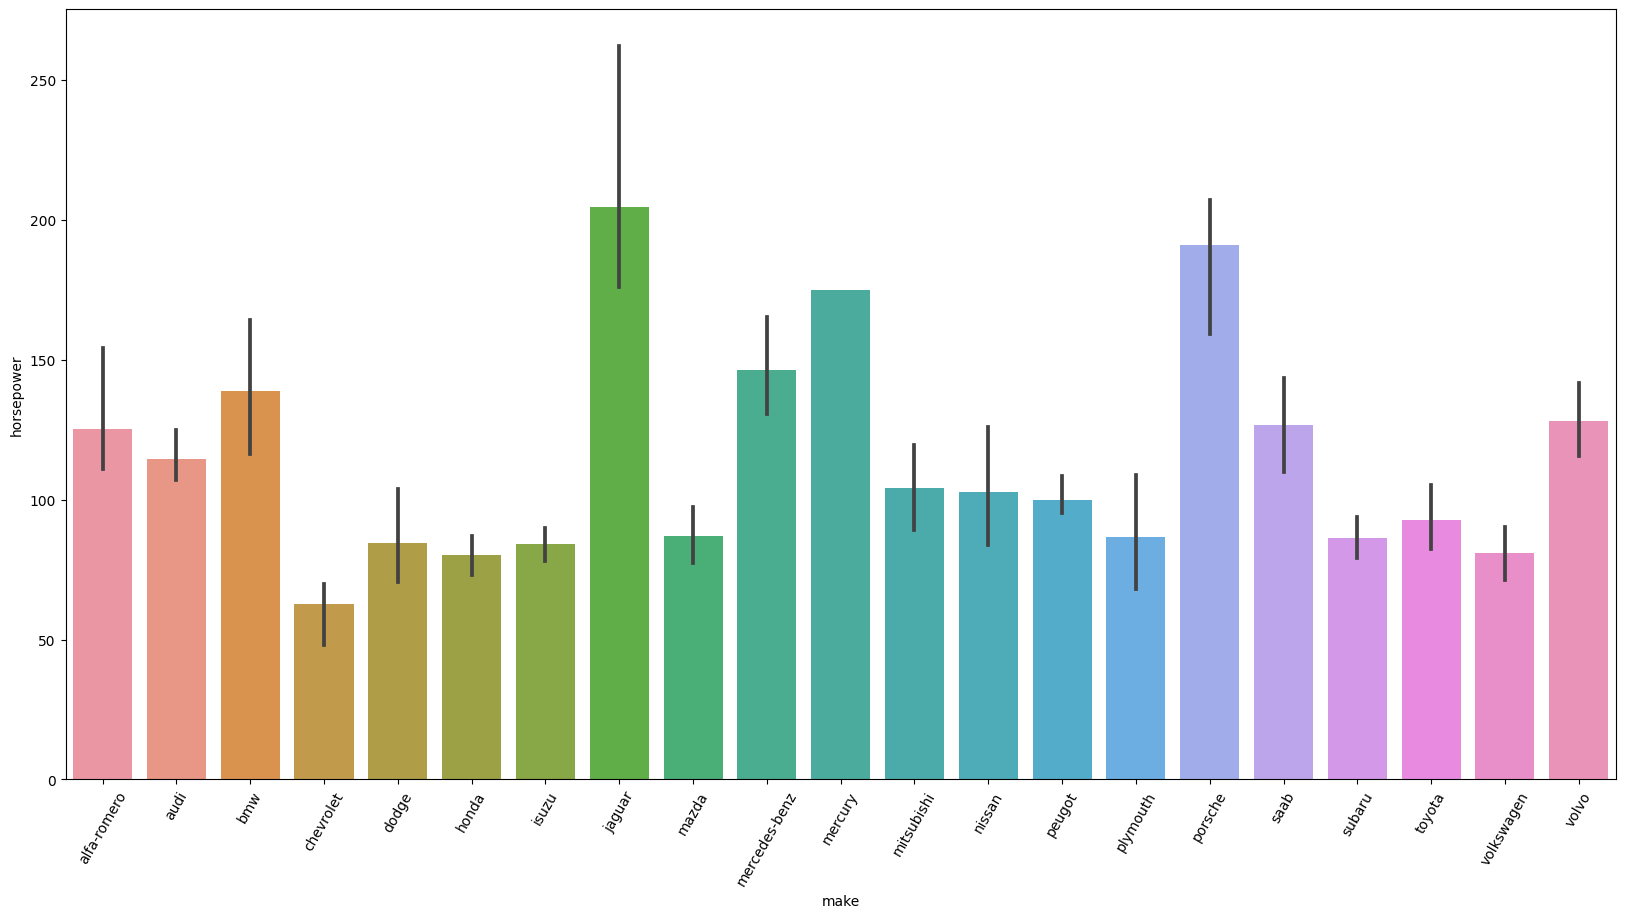

In [75]:
# Make and horsepower
plt.figure(figsize=(20,10))
plt.xticks(rotation=60)
sns.barplot(data=am_df, x="make", y="horsepower")

# Top 3 makes with highest horsepower: Jaguar, Porsche and Mercury.
# Chevrolet has the lowest horsepower.


Text(0.5, 1.0, 'Highway mpg')

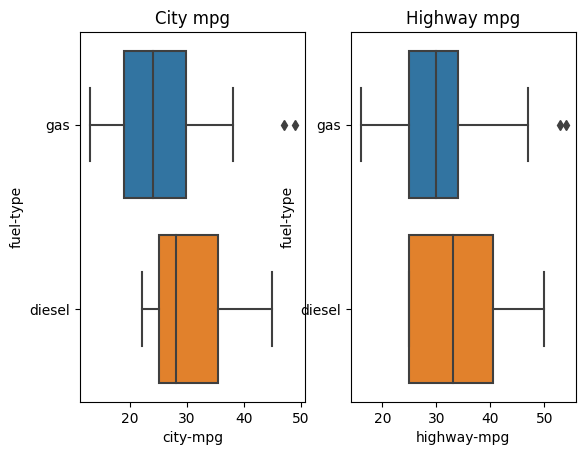

In [76]:
# Fuel type and city mpg
# Compare two plots easily with having them side by side
fig, ax=plt.subplots(1,2)
sns.boxplot(data=am_df, x="city-mpg", y="fuel-type", ax=ax[0])
ax[0].set_title("City mpg")
sns.boxplot(data=am_df, x="highway-mpg", y="fuel-type", ax=ax[1])
ax[1].set_title("Highway mpg")
# Diesel is the better choice for city mpg with a higher mean, although diesel is more negatively skewed.
# Diesel has the better mpg in the city and on the highway.

<AxesSubplot: xlabel='price', ylabel='symboling'>

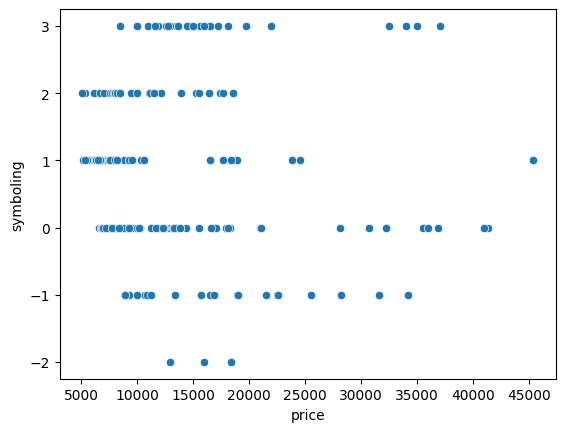

In [77]:
# Symboling and price. Reminder: symboling -> risky to safe -> corresponds with -> 3 to -2
sns.scatterplot(data=am_df, x="price", y="symboling")

# Majority of the automobiles have a rating of 0 and above.
# Very few are pretty safe (rating of -2)
# There are only a few that are expensive and more risky
# Majority of the cars are under 25,000

Text(0.5, 1.0, 'Highway mpg')

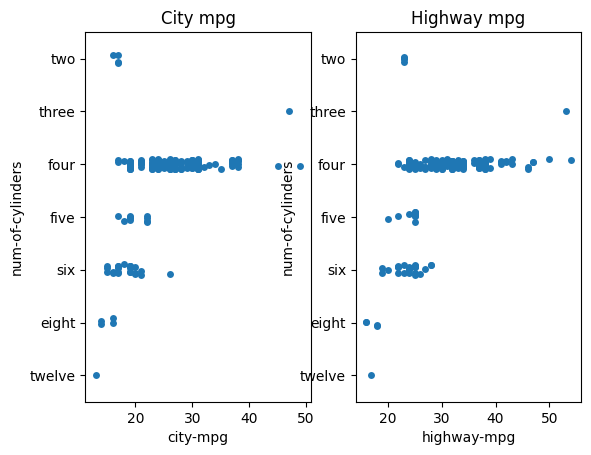

In [78]:
# No of cylinders and fuel efficiency
# First, we need to sort the data according to number of cylinders to help make the graphs easier to read
custom_dict = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
sorted_cyl = am_df.sort_values(by=['num-of-cylinders'], key=lambda x: x.map(custom_dict))

# Plot them together for ease of comparison
fig, ax=plt.subplots(1,2)
sns.stripplot(data=sorted_cyl, x="city-mpg", y="num-of-cylinders", ax=ax[0])
ax[0].set_title("City mpg")
sns.stripplot(data=sorted_cyl, x="highway-mpg", y="num-of-cylinders", ax=ax[1])
ax[1].set_title("Highway mpg")

# It appears that cars with more cylinders have typically worse fuel efficiency, which is what I expected.

<AxesSubplot: xlabel='make', ylabel='price'>

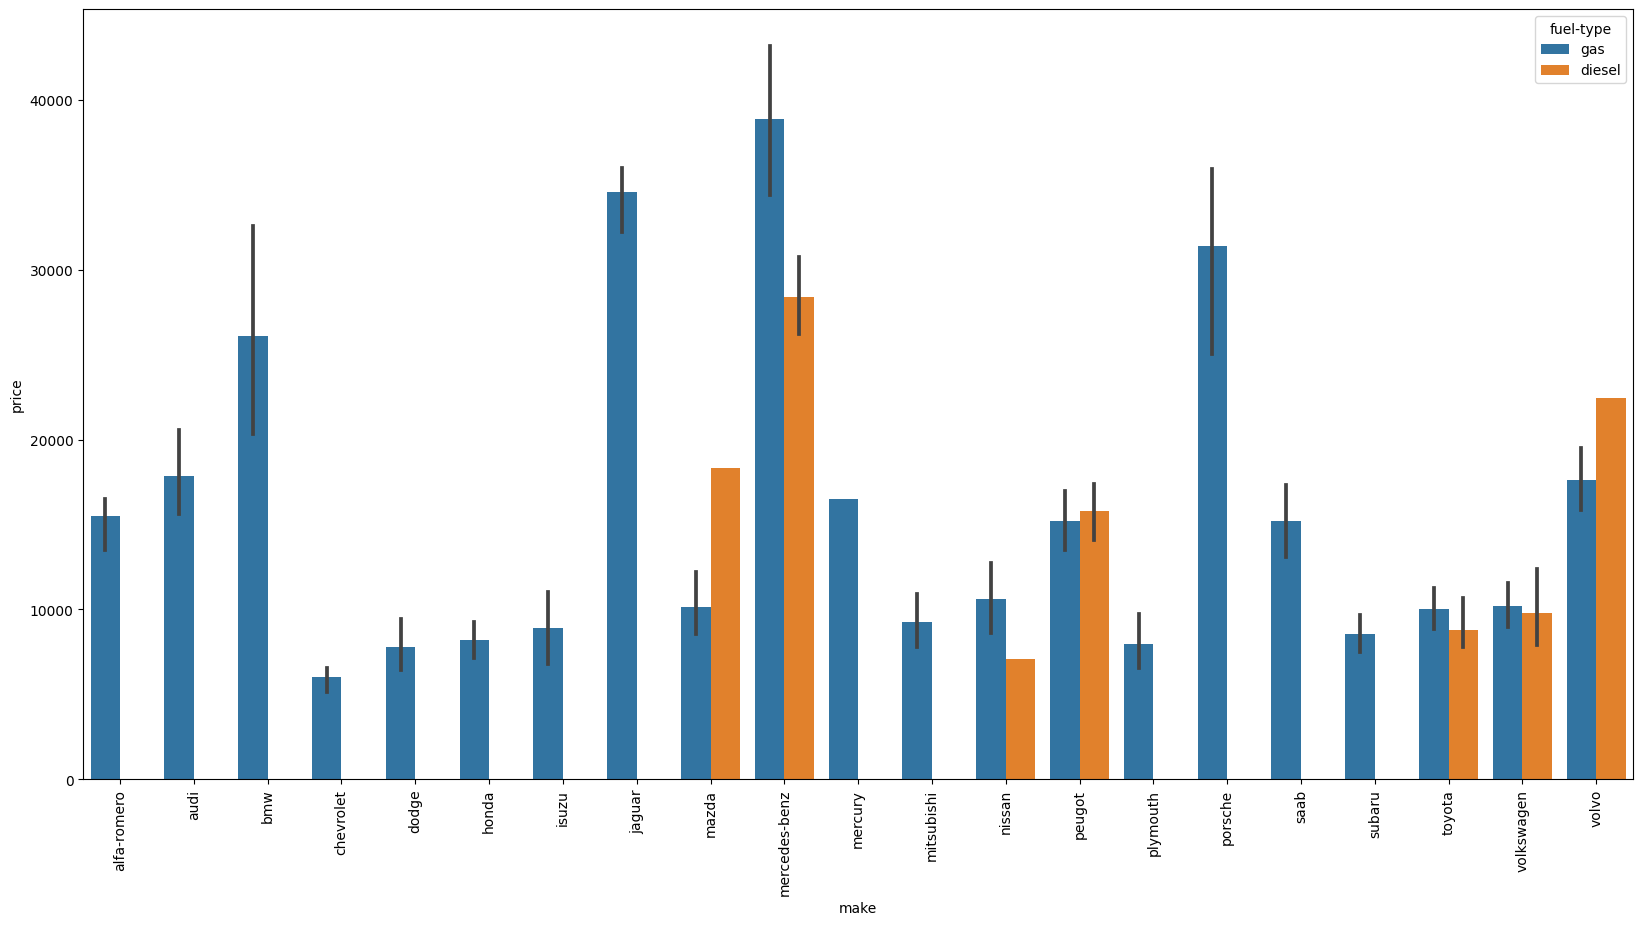

In [79]:
# Car make, fuel type and price
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(data=am_df, x="make", y="price", hue="fuel-type")

# Majority of the makes only have gas cars
# Most expensive are the mercedes-benz, jaguar and porsche - all gas
# No clear answer to suggest if gas or diesel is typically cheaper, if a make has both types.

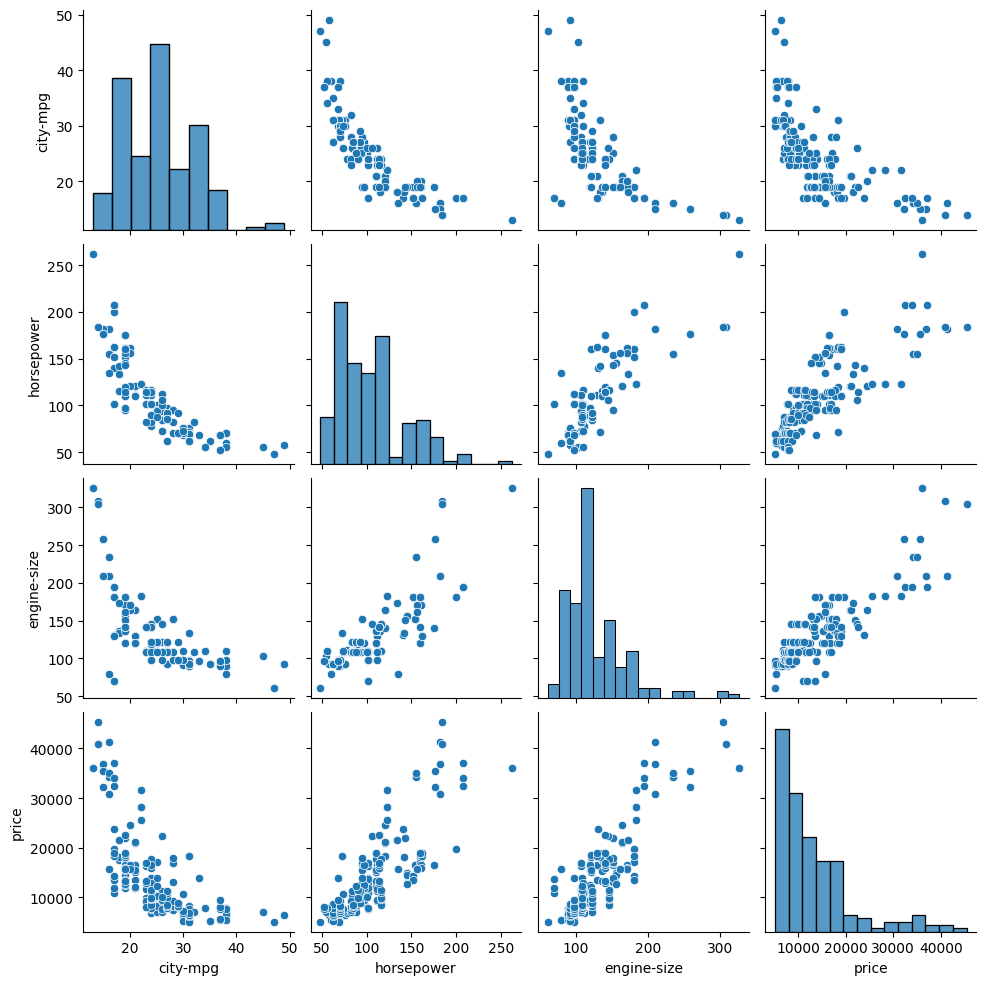

In [80]:
# A look at four features in a scatter matrix

sns.pairplot(am_df[["city-mpg", "horsepower", "engine-size", "price"]], diag_kind="hist")

# City mpg is negatively correlated with horsepower, engine size and price. 
# Horsepower is positively correlated with engine size and price.
# Engine size is positively correlated with price.

<AxesSubplot: xlabel='body-style', ylabel='price'>

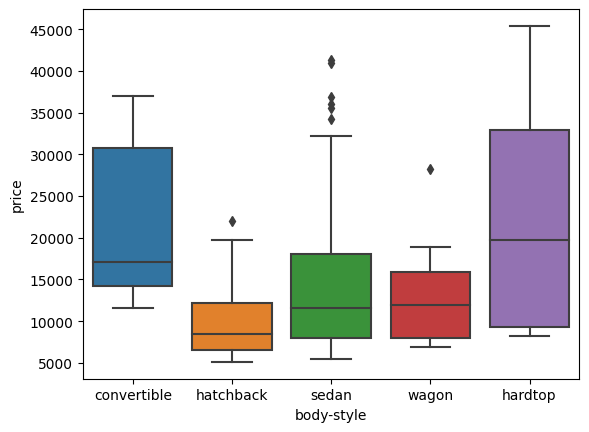

In [81]:
# A look at body style and their prices

sns.boxplot(x="body-style", y="price", data=am_df)

# Hardtops have the largest mean price and greatest spread in prices.
# Hatchbacks have the lowest mean price and smallest spread in prices.


Text(0.5, 1.0, 'Body Style')

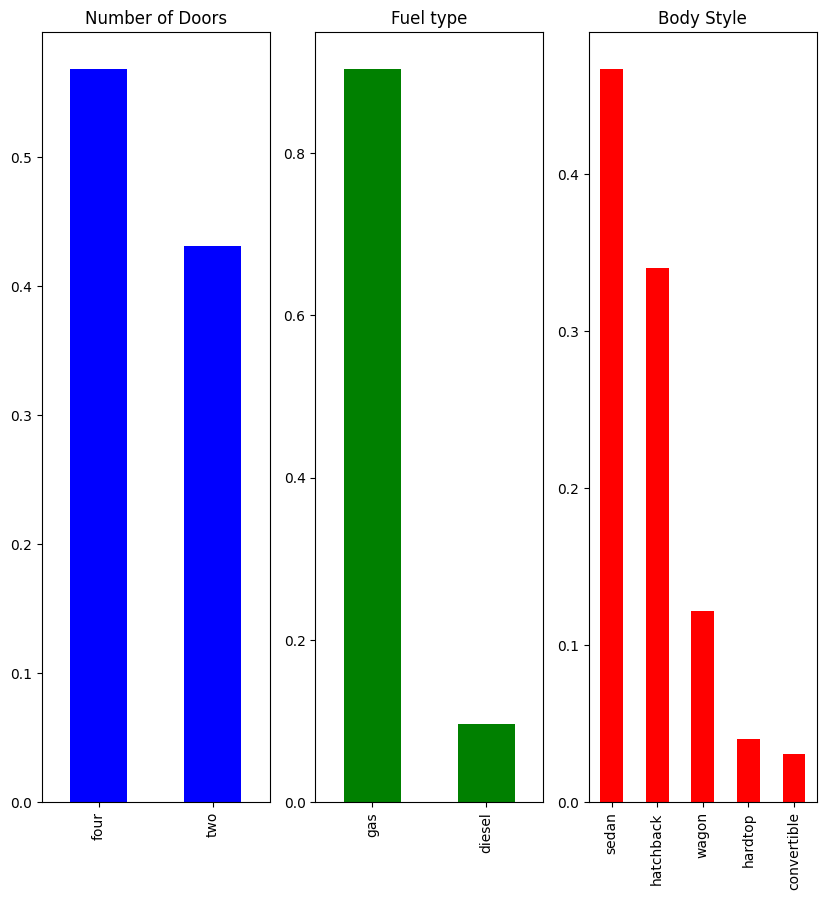

In [82]:
# Look at the frequency of some common features.

fig, ax=plt.subplots(1,3)

am_df['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,10),kind='bar',color='blue', ax=ax[0])
ax[0].set_title("Number of Doors")

am_df['fuel-type'].value_counts(normalize=True).plot(figsize=(10,10),kind='bar',color='green', ax=ax[1])
ax[1].set_title("Fuel type")

am_df['body-style'].value_counts(normalize=True).plot(figsize=(10,10),kind='bar',color='red', ax=ax[2])
ax[2].set_title("Body Style")

# Majority of the cars are four doors.
# A very large majority of the cars are gas.
# Majority of the car styles is sedan.
